In [1]:
!pip install keras-vis
!pip install tensorflow
!pip install tf-keras-vis tensorflow

In [2]:
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16 as Model
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np
from matplotlib import pyplot as plt
# %matplotlib inline
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras import backend as K
from tf_keras_vis.saliency import Saliency
from tf_keras_vis.utils import normalize
from tensorflow.keras.applications.vgg16 import decode_predictions
import json
# Explicitly import Iterable from collections.abc
from collections.abc import Iterable



In [3]:
#utility function to show images
def display_imgs(images):
  subprot_args = {
   'nrows': 1,
   'ncols': 4,
   'figsize': (6, 3),
   'subplot_kw': {'xticks': [], 'yticks': []}
  }
  f, ax = plt.subplots(**subprot_args)
  for i in range(len(images)):
    ax[i].imshow(images[i])
  plt.tight_layout()
  plt.show()

In [4]:
# Load model
model = Model(weights='imagenet', include_top=True)
model.summary()



Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [21]:
img1 = load_img('Autistic-1.jpg', target_size=(224, 224))
img2 = load_img('Autistic-2.jpg', target_size=(224, 224))
img3 = load_img('Non-Autistic-1.jpg', target_size=(224, 224))
img4 = load_img('Non-Autistic-2.jpg', target_size=(224, 224))

NameError: name 'X_train' is not defined

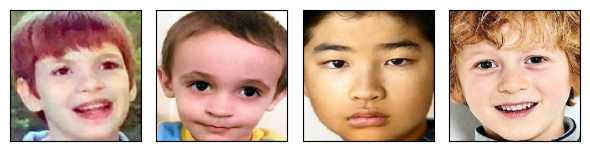

In [6]:
#create array of images
images = np.asarray([np.array(img1), np.array(img2), np.array(img3), np.array(img4)])

#show images
display_imgs(images)

In [7]:

#convert to numpy array for reshaping
img1 = img_to_array(img1)
img2 = img_to_array(img2)
img3 = img_to_array(img3)
img4 = img_to_array(img4)

In [8]:

#reshape to prepare for processing
img1 = img1.reshape(1,224,224,3)
img2 = img2.reshape(1,224,224,3)
img3 = img3.reshape(1,224,224,3)
img4 = img4.reshape(1,224,224,3)

In [9]:

#preprocess to prepare for input
img1 = preprocess_input(img1)
img2 = preprocess_input(img2)
img3 = preprocess_input(img3)
img4 = preprocess_input(img4)

In [10]:

# predictions with input images
yhat1 = model.predict(img1)
yhat2 = model.predict(img2)
yhat3 = model.predict(img3)
yhat4 = model.predict(img4)

1/1 [==============================] - 0s 186ms/step


In [11]:

#decode predictions
label1 = decode_predictions(yhat1)
label2 = decode_predictions(yhat2)
label3 = decode_predictions(yhat3)
label4 = decode_predictions(yhat4)

In [12]:

# extract top most prediction for each input
label1 = label1[0][0]
label2 = label2[0][0]
label3 = label3[0][0]
label4 = label4[0][0]

In [13]:
#plt.imshow(image1)
print('%s (%.2f%%)' % (label1[1], label1[2]*100))
#plt.imshow(image2)
print('%s (%.2f%%)' % (label2[1], label2[2]*100))
#plt.imshow(image3)
print('%s (%.2f%%)' % (label3[1], label3[2]*100))
#plt.imshow(image4)
print('%s (%.2f%%)' % (label4[1], label4[2]*100))

bonnet (57.04%)
banana (15.88%)
bow_tie (18.06%)
wig (24.47%)


In [14]:
import urllib.request

# URL of the file to download
url = "https://raw.githubusercontent.com/raghakot/keras-vis/master/resources/imagenet_class_index.json"

# Destination path to save the downloaded file
destination_path = "imagenet_class_index.json"

# Download the file
urllib.request.urlretrieve(url, destination_path)

print("File downloaded successfully.")


File downloaded successfully.


In [15]:
#prepare 1000 classes
CLASS_INDEX = json.load(open("imagenet_class_index.json"))
classlabel = []
for i_dict in range(len(CLASS_INDEX)):
    classlabel.append(CLASS_INDEX[str(i_dict)][1])
print("N of class={}".format(len(classlabel)))

N of class=1000


In [16]:


#Top 5 classes predicted
class_idxs_sorted1 = np.argsort(yhat1.flatten())[::-1]
class_idxs_sorted2 = np.argsort(yhat2.flatten())[::-1]
class_idxs_sorted3 = np.argsort(yhat3.flatten())[::-1]
class_idxs_sorted4 = np.argsort(yhat4.flatten())[::-1]

topNclass         = 5

print('\nfirst image\n')
for i, idx in enumerate(class_idxs_sorted1[:topNclass]):
    print("Top {} predicted class:     Pr(Class={:18} [index={}])={:5.3f}".format(
          i + 1,classlabel[idx],idx,yhat1[0,idx]))

print('\nsecond image\n')
for i, idx in enumerate(class_idxs_sorted2[:topNclass]):
    print("Top {} predicted class:     Pr(Class={:18} [index={}])={:5.3f}".format(
          i + 1,classlabel[idx],idx,yhat2[0,idx]))

print('\nthird image\n')
for i, idx in enumerate(class_idxs_sorted3[:topNclass]):
    print("Top {} predicted class:     Pr(Class={:18} [index={}])={:5.3f}".format(
          i + 1,classlabel[idx],idx,yhat3[0,idx]))

print('\nFourth image\n')
for i, idx in enumerate(class_idxs_sorted4[:topNclass]):
    print("Top {} predicted class:     Pr(Class={:18} [index={}])={:5.3f}".format(
          i + 1,classlabel[idx],idx,yhat4[0,idx]))


first image

Top 1 predicted class:     Pr(Class=bonnet             [index=452])=0.570
Top 2 predicted class:     Pr(Class=wig                [index=903])=0.102
Top 3 predicted class:     Pr(Class=ice_lolly          [index=929])=0.061
Top 4 predicted class:     Pr(Class=bathing_cap        [index=433])=0.059
Top 5 predicted class:     Pr(Class=shower_cap         [index=793])=0.043

second image

Top 1 predicted class:     Pr(Class=banana             [index=954])=0.159
Top 2 predicted class:     Pr(Class=bow_tie            [index=457])=0.128
Top 3 predicted class:     Pr(Class=ice_lolly          [index=929])=0.065
Top 4 predicted class:     Pr(Class=neck_brace         [index=678])=0.033
Top 5 predicted class:     Pr(Class=hotdog             [index=934])=0.031

third image

Top 1 predicted class:     Pr(Class=bow_tie            [index=457])=0.181
Top 2 predicted class:     Pr(Class=neck_brace         [index=678])=0.092
Top 3 predicted class:     Pr(Class=seat_belt          [index=785])=0

In [17]:

from vis import utils  # Importing the utils module
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras import backend as K
from tf_keras_vis.saliency import Saliency
from tf_keras_vis.utils import normalize
from tensorflow.keras.applications.vgg16 import decode_predictions
import json

# Assuming you've defined `model` somewhere in your code

# Assuming you've defined `model` somewhere in your code

# Find the index of the layer by name
layer_names = [layer.name for layer in model.layers]
layer_idx = layer_names.index('predictions')

# Swap softmax layer with linear layer
model.layers[layer_idx].activation = tf.keras.activations.linear

# No need to apply modifications if you're only changing the activation function



In [18]:

#get the input image index
from tf_keras_vis.utils.scores import CategoricalScore
#cat - 281, dog -235 , hen -8, tiger - 292
score = CategoricalScore([281, 235, 8 , 292])

from matplotlib import cm
from tf_keras_vis.gradcam import Gradcam


In [19]:
input_classes = ['Cat', 'Dog', 'Hen', 'Tiger']

input_images = preprocess_input(images)

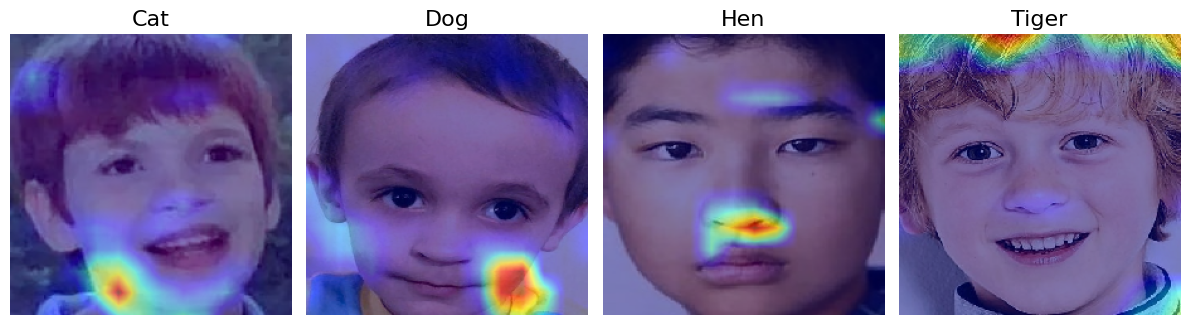

In [20]:

# Create Gradcam object
gradcam = Gradcam(model,
                  clone=True)

# Generate heatmap with GradCAM
cam = gradcam(score,
              input_images,
              penultimate_layer=-1)

#show generated images
f, ax = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))
for i, img_class in enumerate(input_classes):
    heatmap = np.uint8(cm.jet(cam[i])[..., :4] * 255)
    ax[i].set_title(img_class, fontsize=16)
    ax[i].imshow(images[i])
    ax[i].imshow(heatmap, cmap='jet', alpha=0.5) # overlay
    ax[i].axis('off')
plt.tight_layout()
plt.show()

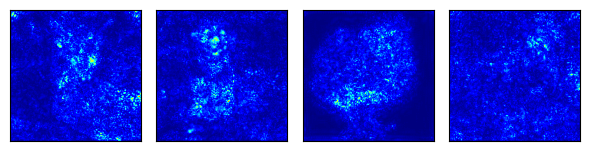

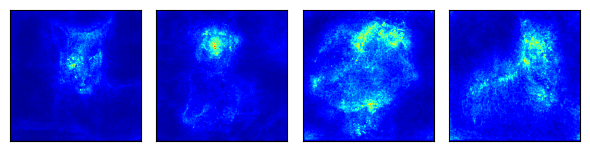

In [27]:
from tf_keras_vis.saliency import Saliency
from tf_keras_vis.utils import normalize

#Create Saliency object
saliency = Saliency(model, clone=False)

# Generate saliency map
saliency_map = saliency(score, input_images)
saliency_map = normalize(saliency_map)

subprot_args = {
   'nrows': 1,
   'ncols': 4,
   'figsize': (6, 3),
   'subplot_kw': {'xticks': [], 'yticks': []}
}
f, ax = plt.subplots(**subprot_args)
for i in range(len(saliency_map)):
   ax[i].imshow(saliency_map[i], cmap='jet')
plt.tight_layout()
plt.show()

saliency_map = saliency(score, input_images, smooth_samples=20)
saliency_map = normalize(saliency_map)

f, ax = plt.subplots(**subprot_args)
for i in range(len(saliency_map)):
   ax[i].imshow(saliency_map[i], cmap='jet')
plt.tight_layout()
plt.show()